<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/intro/colab_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to colab

This notebook illustrates how to install the PML code and various other libraries. More details in the [official documentation](https://colab.research.google.com/notebooks/intro.ipynb) and the [official introduction](https://colab.research.google.com/notebooks/basic_features_overview.ipynb).


In [1]:
IS_COLAB = ('google.colab' in str(get_ipython()))
print(IS_COLAB)


True


# How to import standard libraries

Colab comes with most of the packages we need pre-installed. 





In [2]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import glob

from typing import Any, Callable, Dict, Iterator, Mapping, Optional, Sequence, Tuple

To install new packages, use the following (see [this page](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb) for details):

```
!pip install foo
```



## Numpy

In [ ]:
import numpy as np
np.set_printoptions(precision=3)

A = np.random.randn(2,3)
print(A)

[[0.414 1.496 0.64 ]
 [0.953 1.708 0.251]]


## Pandas

In [ ]:
import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Year', 'Origin', 'Name']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values="?")

df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Sklearn

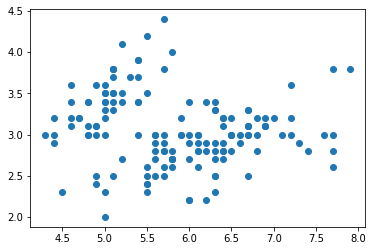

In [ ]:
import sklearn

from sklearn.datasets import load_iris
iris = load_iris()
# Extract numpy arrays
X = iris.data 
y = iris.target

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

## JAX

In [ ]:
# JAX (https://github.com/google/jax)

import jax
import jax.numpy as jnp
A = jnp.zeros((3,3))

# Check if JAX is using GPU
print("jax backend {}".format(jax.lib.xla_bridge.get_backend().platform))

jax backend gpu


## Tensorflow

In [ ]:

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

print("tf version {}".format(tf.__version__))
print([d for d in tf.config.list_physical_devices()])

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. DNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

tf version 2.4.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## PyTorch

In [ ]:

import torch
import torchvision
print("torch version {}".format(torch.__version__))
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("Torch cannot find GPU")

torch version 1.7.0+cu101
Tesla T4


# Plotting

Colab lets you make static plots using matplotlib, as shown below.

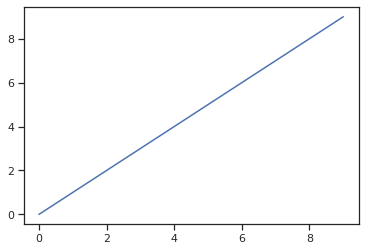

In [ ]:
import matplotlib.pyplot as plt
import PIL
import imageio
import seaborn as sns;
sns.set(style="ticks", color_codes=True)

from IPython import display

plt.figure()
plt.plot(range(10))
plt.savefig('myplot.png')

Colab also lets you create interactive plots using various javascript libraries - see [here](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=QSMmdrrVLZ-N) for details.

# Accessing local files

Clicking on the file folder icon on the left hand side of colab lets you browse local files. Right clicking on a filename lets you download it to your local machine. Double clicking on a file will open it in the file viewer/ editor, which appears on the right hand side. 

The result should look something like this:

<img src="https://github.com/probml/pyprobml/blob/
master/book1/intro/figures/colab-image-viewer.png?raw=true">


You can also use standard unix commands to manipulate files, as we show below.

In [ ]:
!pwd

/content


In [ ]:
!ls

myplot.png  sample_data


In [ ]:
!echo 'foo bar' > foo.txt
!cat foo.txt

foo bar


You can open text files in the editor by clicking on their filename in the file browser, or programmatically as shown below.

In [ ]:
from google.colab import files
files.view('foo.txt')

<IPython.core.display.Javascript object>

If you make changes to a file containing code, the new version of the file will not be noticed unless you use the magic below.

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Syncing with Google drive

Files that you generate in, or upload to, colab are ephemeral, since colab is a temporary environment with an idle timeout of 90 minutes and an absolute timeout of 12 hours (24 hours for Colab pro). To save any files permanently, you need to mount your google drive folder as we show below. (Executing this command will open a new window in your browser - you need cut and paste the password that is shown into the prompt box.)



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!pwd

with open('/content/gdrive/MyDrive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/MyDrive/foo.txt

Mounted at /content/gdrive
/content
Hello Google Drive!

# Working with github

It is possible to download code (or data) from githib into a local directory on this virtual machine.  It is also possible to upload local files back to github, although that is more complex. See details below.

## Cloning a repo from github

Below we show how to clone the repo for this book, so you can access its code and data.

In [ ]:

!rm -rf pyprobml # Remove any old local directory to ensure fresh install
!git clone https://github.com/probml/pyprobml


Cloning into 'pyprobml'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 5624 (delta 37), reused 21 (delta 8), pack-reused 5555
Receiving objects: 100% (5624/5624), 198.09 MiB | 23.94 MiB/s, done.
Resolving deltas: 100% (3179/3179), done.


In [ ]:
!ls

foo.txt  myplot.png  pyprobml  sample_data


We can access data as shown below.

In [ ]:

datadir = 'pyprobml/data'
import re
fname = os.path.join(datadir, 'timemachine.txt')
with open(fname, 'r') as f:
    lines = f.readlines()
    sentences = [re.sub('[^A-Za-z]+', ' ', st).lower().split()
                   for st in lines]
for  i in range(5):
  words = sentences[i]
  print(words)

['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
['i']
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him', 'was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and', 'twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the', 'fire', 'burned', 'brightly', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent', 'lights', 'in', 'the', 'lilies', 'of', 'silver', 'caught', 'the', 'bubbles', 'that', 'flashed', 'and', 'passed', 'in', 'our', 'glasses', 'our', 'chairs', 'being', 'his', 'patents', 'embraced', 'and', 'caressed', 'us', 'rather', 'than', 'submitted', 'to', 'be', 'sat', 'upon', 'and', 'there', 'was', 'that', 'luxurious', 'after', 'dinner', 'atmosphere', 'when', 'thought', 'roams', 'gracefully', 'free', 'of', 'the', 'trammels', 'of', 'precision', 'and', 'he', 'put', 'it', 'to', 'us', 'in', 'this', 'way', 'marking', 'the', 'points', 'with', 

We can run any script as shown below.
(Note we first have to define the environment variable for where the figures will be stored.)

plot some activation functions


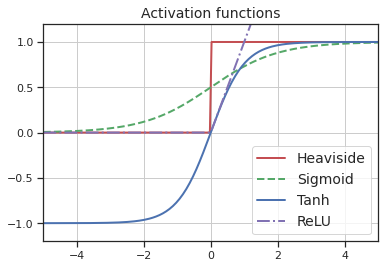

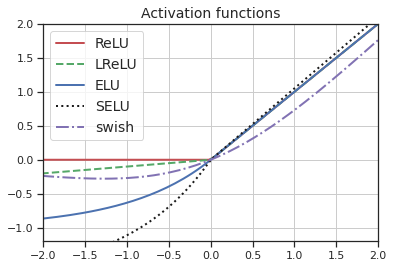

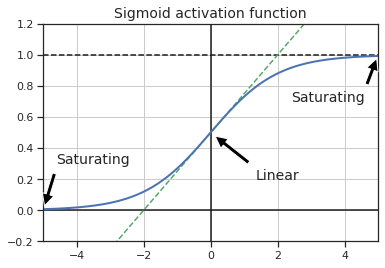

<Figure size 432x288 with 0 Axes>

In [ ]:
import os
os.environ['PYPROBML']='pyprobml'

%run pyprobml/scripts/activation_fun_plot.py

We can also import code, as we show below.

In [ ]:
#os.chdir('pyprobml/scripts')
import pyprobml.scripts.pyprobml_utils as pml
pml.pyprobml_test()


welcome to python probabilistic ML library


## Pushing local files back to github

You can easily save your entire colab notebook to github by choosing 'Save a copy in github' under the File menu in the top left. But if you want to save individual files (eg code that you edited in the colab file editor, or a bunch of images or data files you created), the process is more complex.

You first need to do some setup to create SSH keys on your current colab VM (virtual machine), manually add the keys to your github account, and then copy the keys to your mounted google drive so you can reuse the same keys in the future. This only has to be done once.

After setup, you can use the `git_command` function we define below to securely execute git commands. This works by copying your SSH keys from your google drive to the current colab VM, executing the git command, and then deleting the keys from the VM for safety. 


### Setup

Follow these steps

```
!ssh-keygen -t rsa -b 4096
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
!cat /root/.ssh/id_rsa.pub
```
The cat command will display your public key in the colab window.
Cut and paste this and manually add to your github account following [these instructions](https://github.com/settings/keys).

Test it worked
```
!ssh -T git@github.com
```

Finally, save the generated keys to your Google drive

```
from google.colab import drive
drive.mount('/content/drive')
!mkdir /content/drive/MyDrive/ssh/
!cp  -r  ~/.ssh/* /content/drive/MyDrive/ssh/
!ls /content/drive/MyDrive/ssh/
```


### Test previous setup

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/ssh/



Mounted at /content/drive
id_rsa	id_rsa.pub  known_hosts


### Executing git commands from colab via SSH

The following function lets you securely doing a git command via SSH.
It copies the keys from your google drive to the local VM, excecutes the command, then removes the keys.



In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:

def git_colab(
    git_command, email="murphyk@gmail.com", username="probml", verbose=False):
  git_command=git_command.replace(r"https://github.com/","git@github.com:")
  print('executing command:', git_command)
  # copy keys from drive to local .ssh folder
  if verbose:
    print('Copying keys from gdrive to local VM')
  !rm -rf ~/.ssh/
  !mkdir ~/.ssh/
  !cp  -r /content/drive/MyDrive/ssh/* ~/.ssh/
  if verbose:
    !ls ~/.ssh/
  # configure ssh and test it
  if verbose:
    print('Setup SSH')
  !ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
  !ssh -T git@github.com
  # git commands
  if verbose:
    print('Executing git commands')
  !git config --global user.email $email
  !git config --global user.name $username
  !$git_command
  # cleanup
  if verbose:
    print('Cleanup local VM')
  !rm -r ~/.ssh/
  !git config --global user.email ""
  !git config --global user.name ""
  # check that cleanup worked
  #!ssh -T git@github.com # should say 'Host key verification failed'

Below we show how to use this. We first clone the repo to this colab VM. We then add a bunch of files and commit them back.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # must do this before running git_colab

!rm -rf pyprobml
#!git clone https://github.com/probml/pyprobml.git # clones using wrong credentials
git_colab("git clone https://github.com/probml/pyprobml.git") # clone using your credentials



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
executing command: git clone git@github.com:probml/pyprobml.git
# github.com:22 SSH-2.0-babeld-27464712
Hi murphyk! You've successfully authenticated, but GitHub does not provide shell access.
Cloning into 'pyprobml'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 5650 (delta 52), reused 42 (delta 17), pack-reused 5555
Receiving objects: 100% (5650/5650), 198.09 MiB | 30.83 MiB/s, done.
Resolving deltas: 100% (3194/3194), done.


In [ ]:
# To add stuff to github, you must be inside the git directory
%cd /content/pyprobml
!echo 'this is a test' > scripts/foo.txt
git_colab("git add scripts; git commit -m 'push from colab'; git push")
%cd /content

/content/pyprobml
executing command: git add scripts; git commit -m 'push from colab'; git push
# github.com:22 SSH-2.0-babeld-27464712
Hi murphyk! You've successfully authenticated, but GitHub does not provide shell access.
[master dddd479] push from colab
 1 file changed, 1 insertion(+)
 create mode 100644 scripts/foo.txt
Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 341 bytes | 341.00 KiB/s, done.
Total 4 (delta 2), reused 1 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:probml/pyprobml.git
   4b9ca38..dddd479  master -> master
/content


In [ ]:
# cleanup
%cd /content/pyprobml
git_colab("git rm scripts/foo*.txt; git commit -m 'colab cleanup'; git push")
%cd /content

/content/pyprobml
executing command: git rm scripts/foo*.txt; git commit -m 'colab cleanup'; git push
# github.com:22 SSH-2.0-babeld-27464712
Hi murphyk! You've successfully authenticated, but GitHub does not provide shell access.
rm 'scripts/foo.txt'
rm 'scripts/foo3.txt'
[master 2ce6aa6] colab cleanup
 2 files changed, 2 deletions(-)
 delete mode 100644 scripts/foo.txt
 delete mode 100644 scripts/foo3.txt
Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 279 bytes | 279.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:probml/pyprobml.git
   59ab330..2ce6aa6  master -> master
/content


### Library version

It is annoying to have to cut-and-paste the git_colab.py function into each notebook. Below we show how to use the version of this function that is stored in github.

In [70]:
!rm -rf git_colab*.*
#!wget https://raw.github.com/probml/pyprobml/blob/master/scripts/git_colab.py
!wget https://raw.githubusercontent.com/probml/pyprobml/master/scripts/git_colab.py  --no-cache 

# The no-cache flag does not work, for reasons explained here
#https://superuser.com/questions/1322577/wget-without-keeping-the-cache
# so if you edit this file remotely, you'll have to wait for github to refresh it.


--2021-01-19 21:27:26--  https://raw.githubusercontent.com/probml/pyprobml/master/scripts/git_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1343 (1.3K) [text/plain]
Saving to: ‘git_colab.py’

git_colab.py        100%[===================>]   1.31K  --.-KB/s    in 0s      

2021-01-19 21:27:26 (79.3 MB/s) - ‘git_colab.py’ saved [1343/1343]



In [62]:
!ls

drive  git_colab.py  __pycache__  sample_data


In [71]:
!cat git_colab.py

# Execute a git command via ssh from colab
# Details in https://github.com/probml/pyprobml/blob/master/book1/intro/colab_intro.ipynb
# Authors: Mahmoud Soliman <mjs@aucegypt.edu> and Kevin Murphy <murphyk@gmail.com>

import os

def git_ssh(git_command, email="murphyk@gmail.com", username="probml",
            verbose=False):
    git_command=git_command.replace(r"https://github.com/","git@github.com:")
    print('executing command via ssh:', git_command)
    # copy keys from drive to local .ssh folder
    print(verbose)
    if verbose:
        print('Copying keys from gdrive to local VM')
    os.system('rm -rf ~/.ssh')
    os.system('mkdir ~/.ssh')
    os.system('cp  -r /content/drive/MyDrive/ssh/* ~/.ssh/')
    os.system('ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts')
    os.system('ssh -T git@github.com') # test
    # git commands
    if verbose:
        print('Executing git commands')
    os.system('git config --global user.email {}'.format(email))
    os.system('git config --

In [72]:
import importlib
importlib.reload(gc)

import git_colab as gc
gc.git_ssh('test', verbose=True) # this is not a real git command


executing command via ssh: foo
True
Copying keys from gdrive to local VM
Executing git commands
Cleanup local VM


# Software engineering tools

 [Joel Grus has argued](https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/edit) that notebooks are bad for developing complex software, because they encourage creating monolithic notebooks instead of factoring out code into separate, well-tested files. 
 
[Jeremy Howard has responded to Joel's critiques here](https://www.youtube.com/watch?v=9Q6sLbz37gk&feature=youtu.be). In particular, the FastAI organization has created [nbdev](https://github.com/fastai/nbdev) which has various tools that make notebooks more useful.



## Avoiding problems with global state

One of the main drawbacks of colab is that all variables are globally visible, so you may accidently write a function that depends on the current state of the notebook, but which is not passed in as an argument. Such a function may fail if used in a different context.

One solution to this is to put most of your code in files, and then have the notebook simply import the code and run it, like you would from the command line. Then you can always run the notebook from scratch, to ensure consistency.

Another solution is to use the [localscope](https://localscope.readthedocs.io/en/latest/README.html) package can catch some of these errors.




In [ ]:
!pip install localscope


  Created wheel for localscope: filename=localscope-0.1.3-cp36-none-any.whl size=4068 sha256=7a5d6718e16dbff82fe94e1229d233a19ef52280ff0d4fc48ef62a2ba41d5855
  Stored in directory: /root/.cache/pip/wheels/89/57/33/ce153d31de05d74323324df0f45a08ea99e92300e549da5154
Successfully built localscope


In [ ]:
from localscope import localscope

In [ ]:
a = 'hello world'
def myfun():
   print(a) # silently accesses global variable

myfun()

hello world


In [ ]:
a = 'hello world'
@localscope
def myfun():
  print(a)

myfun()

ValueError: ignored

In [ ]:
def myfun2():
  return 42

@localscope
def myfun3():
  return myfun2()

  

ValueError: ignored

In [ ]:
@localscope.mfc # allow for global methods, functions, classes
def myfun4():
  return myfun2()

myfun4()

42

## Factoring out functionality into files stored on github

The recommended workflow is to  develop your code in the colab in the usual way, and when it is working, to factor out the core code into separate files. You can  edit these files locally in the colab editor, and then push the code to github when ready (see details above). To run functions defined in a local file, just import them. For example, suppose we have created the file /content/pyprobml/scripts/fit_flax.py; we  can use this idiom to run its test suite:
```
import pyprobml.scripts.fit_flax as ff
ff.test()
```
If you make local edits, you want to be sure
 that you always import the latest version of the file (not a cached version). So you need to use this piece of colab magic first:
```
%load_ext autoreload
%autoreload 2
```



## File editors

Colab has a simple file editor, illustrated below for an example file.

<img src="https://github.com/probml/pyprobml/blob/
master/book1/intro/figures/colab-file-editor.png?raw=true">



## VScode
The default colab file editor is very primitive.
See [this article](https://amitness.com/vscode-on-colab/) for how to run VScode
from inside your Colab browser. Unfortunately this is a bit slow. It is also possible to run VScode locally on your laptop, and have it connect to colab via SSH, but this is more complex (see [this medium post](https://medium.com/@robertbracco1/configuring-google-colab-like-a-pro-d61c253f7573#4cf4) for details).


# GPUs

If you select the 'Runtime' menu at top left, and then select 'Change runtime type' and then select 'GPU', you can get free access to a GPU. 


<img src="https://github.com/probml/pyprobml/blob/
master/book1/intro/figures/colab-change-runtime.png?raw=true" height=300>
<img src="https://github.com/probml/pyprobml/blob/
master/book1/intro/figures/colab-select-gpu.png?raw=true" height=200>





To get access to more powerful machines (with faster GPU, TPU, more memory, and/or to use colab for up to 24h instead of 12h (and with longer idle timeouts), you can subscript to [Colab Pro](https://colab.research.google.com/signup). At the time of writing (Jan 2021), the cost is $10/month (USD). This is a good deal if you use GPUs a lot. Using my pro account, when I select large memory, I get the spec below. (The free version has roughtly half the memory and half the speed for GPUs.)



In [80]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
print(gpu_info)

Tue Jan 19 23:05:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [79]:
!grep Model: /proc/driver/nvidia/gpus/*/information | awk '{$1="";print$0}'

 Tesla P100-PCIE-16GB


In [10]:
from psutil import virtual_memory, cpu_count
ram_gb = virtual_memory().total / 1e9
print('RAM (GB)', ram_gb)
print('num cores', cpu_count())

RAM (GB) 27.393773568
num cores 4


In [24]:
!cat /proc/version


Linux version 4.19.112+ (builder@a12462ca91c8) (Chromium OS 10.0_pre377782_p20200113-r10 clang version 10.0.0 (/var/cache/chromeos-cache/distfiles/host/egit-src/llvm-project 4e8231b5cf0f5f62c7a51a857e29f5be5cb55734)) #1 SMP Thu Jul 23 08:00:38 PDT 2020


In [25]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [26]:

!cat /proc/meminfo

MemTotal:       26751732 kB
MemFree:        23346232 kB
MemAvailable:   25708620 kB
Buffers:          115160 kB
Cached:          2450516 kB
SwapCached:            0 kB
Active:           849488 kB
Inactive:        2190092 kB
Active(anon):     426640 kB
Inactive(anon):      412 kB
Active(file):     422848 kB
Inactive(file):  2189680 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               728 kB
Writeback:             0 kB
AnonPages:        473968 kB
Mapped:           276864 kB
Shmem:              1036 kB
Slab:             208840 kB
SReclaimable:     145136 kB
SUnreclaim:        63704 kB
KernelStack:        5584 kB
PageTables:         6824 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    13375864 kB
Committed_AS:    3912488 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             2096 kB
AnonHugePages:   